# 회귀: 독립변수를 통해 종속변수 값을 예측

# 1. K-최근접 이웃 회귀
- 예측하려는 sample에 가장 유사한 샘플 k를 선택
- 이 k개 샘플들의 클래스(값)를 확인하여 이 값들의 평균을 예측하려는 샘플의 값으로 예측

## 농어의 길이와 무게로 예시

In [38]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 이 데이터의 형태 보기

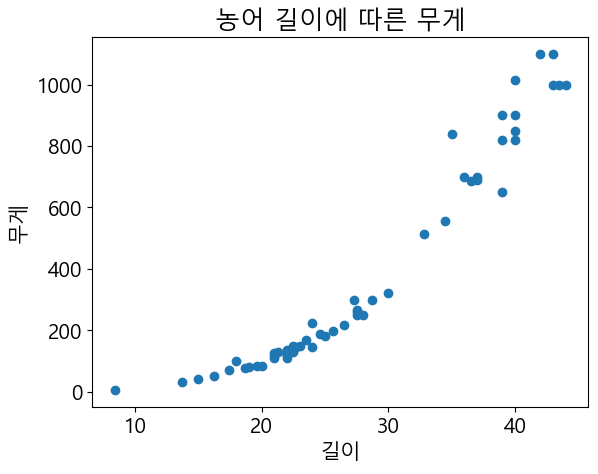

In [39]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
# matplotlib.rcParams['font.family'] = 
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

plt.scatter(perch_length,perch_weight)
plt.title('농어 길이에 따른 무게')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

## train과 test로 나누기

In [40]:
from sklearn.model_selection import train_test_split

# l은 length(독립변수), w는 weight(종속변수)
train_length, test_length, train_weight, test_weight=train_test_split(perch_length,perch_weight, random_state=1234)   # test_size지정안하면 0.25가 default
train_length.shape, train_weight.shape, test_length.shape, test_weight.shape

((42,), (42,), (14,), (14,))

## 머신러닝모델에 넣을려면 독립변수 데이터는 2차원 데이터여야함
## 종속변수의 경우 단일값이라면 그냥 1차원 그대로 나누는것을 권장

In [41]:
# .reshape(-1,1)로 하면 데이터 길이를 몰라도 (n,1)로 바꿔줌
# 독립변수는 무조건 2차원으로 종속변수는 해도 그만 안해도 그만
train_length=train_length.reshape(-1,1)
#train_weight=train_weight.reshape(-1,1)
test_length=test_length.reshape(-1,1)
#test_weight=test_weight.reshape(-1,1)

train_length.shape, train_weight.shape, test_length.shape, test_weight.shape

((42, 1), (42,), (14, 1), (14,))

## sklearn.neighbors.KNeighborsRegressor 사용하여 학습시킴

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=5)  #객체생성, k개수 디폴트값은 5

knr.fit(train_length,train_weight)    #.fit(독립변수,종속변수)으로 훈련

KNeighborsRegressor()

## 결정계수R^2(정확도) 측정
- .score에 독립변수와 종속변수(정답)를 넣고 1에 가까울수록 정확

In [43]:
knr.score(test_length,test_weight)

0.9904071656616933

## 예측-> .predict사용

In [44]:
prediction=knr.predict(test_length)
print(prediction)

[ 238.4  847.   103.   142.    98.   847.  1000.   121.   127.   262.4
  697.2  262.4   71.3  132. ]


## MAE라는 또다른 정확도 지표
- mean absolute error(정답-예측값)

In [45]:
from sklearn.metrics import mean_absolute_error

#예측값
mae=mean_absolute_error(test_weight,prediction)
mae    # 실제 값과 22.7정도 다름

22.764285714285712

## 과대적합과 과소적합
- 과대적합: 훈련세트 정확도> 테스트세트 정확도
- 과소적합: 훈련세트 정확도< 테스트세트 정확도 or 두 정확도 전부 낮음  ->모델이 너무 단순해 train데이터로 적절한 훈련이 되지 않은 경우
## ->train데이터와 test데이터의 정확도가 비슷해야 좋은 모델!!!!!

In [46]:
knr.score(train_length, train_weight)  #train보다 test가 더 높다->과소적합

0.9741519417617656

## 적합 문제 해결하는법:
## 과대적합문제: 모델을 less복잡하게
## 과소적합문제: 모델을 more복잡하게
## k-최근접 이웃 알고리즘은 이웃의 개수 k개룰 줄아면 모델이 더 복잡해지고 정확해짐

In [47]:
# 이웃개수를 직접 설정
knr.n_neighbors=3     #원래 디폴트값은 5

#다시 훈련
knr.fit(train_length, train_weight)
knr.score(train_length,train_weight)   #좀더 높아짐

0.9788851823255422

In [48]:
knr.score(test_length, test_weight)  #과소적합 문제도 해결하고 정확도도 비슷

0.9783550998275901

## mae값도 다시 비교

In [49]:
prediction=knr.predict(test_length)

mae=mean_absolute_error(test_weight,prediction)
mae

33.464285714285715

Text(800, 300, '거의 직선이 됨')

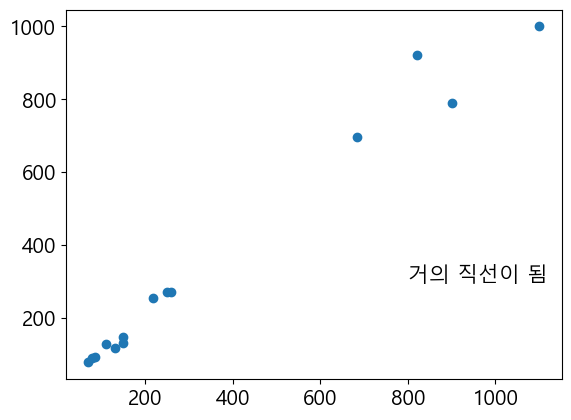

In [50]:
plt.scatter(test_weight,prediction)
plt.text(800,300,s='거의 직선이 됨')

## predict에 넣을떄도 차원으로 넣음

In [51]:
knr.predict([[50]]), knr.predict([[20],[50]])

(array([1000.]), array([  91.66666667, 1000.        ]))

## 어떤이웃이 선택되었는지 보기-> .kneighbors로 확인

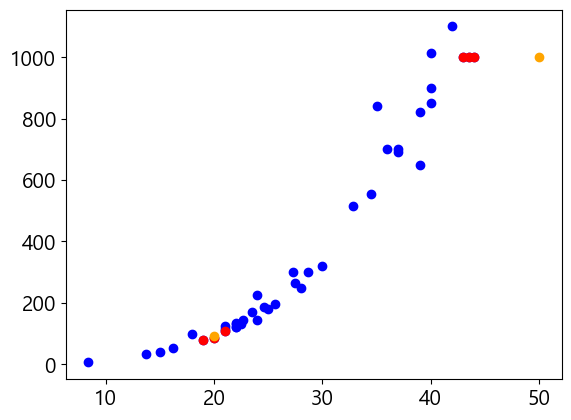

In [52]:
distances, indexes=knr.kneighbors([[20],[50]])     # indexes가 참고한 이웃의 인덱스값임

plt.scatter(train_length, train_weight, color='blue')  #훈련세트
plt.scatter(train_length[indexes], train_weight[indexes], color='red')  #빨간점들은 예측하고 싶은데이터의 이웃들로 선택된 애들
plt.scatter([20,50],[91.6,1000], color='orange')   #노란색이 내가 예측하고 싶은 데이터의 예측값

## 한계: train데이터보다 값이 커지면 이웃에 한계가 있어 정확한 값을 예측하지 못함 !!!!

# 2-1. Linear-Regression
- 특성이 하나인 경우 그 데이터를 가장 잘 대표할 수 있는 직선으로 나타냄

## sklearn.linear_model.LinearRegression 사용
- .fit(), .score(), .predict()메서드가 존재

In [53]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()  #객체생성
lr.fit(train_length,train_weight)   #독립변수와 종속변수(정답) 넣어서 학습시킴

lr.predict([[50]])   # k-이웃의 1000보다 더 정확한 1181값

array([1181.47043921])

## 회귀직선의 기울기(coef_)와 절편(intercept)구하기

In [54]:
lr.coef_, lr.intercept_

(array([36.01339669]), -619.1993953027181)

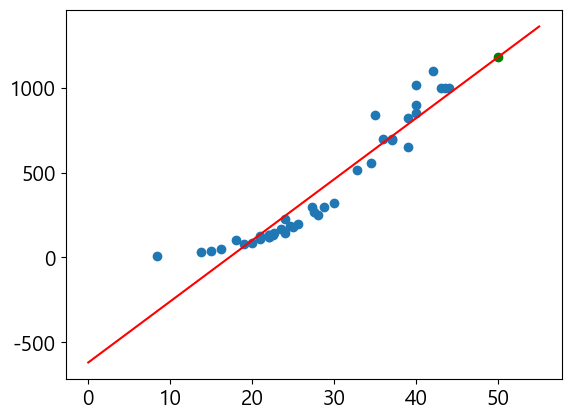

In [55]:
plt.scatter(train_length,train_weight)
plt.plot([0,55],[0*lr.coef_+lr.intercept_,55*lr.coef_+lr.intercept_], color='red')  #plt.plot으로 직선그리기 가능

plt.scatter(50,1181,color='green')  #예측값

## R^2측정

In [56]:
lr.score(train_length,train_weight), lr.score(test_length,test_weight)

(0.9107897177736239, 0.9408438622888375)

## 과소적합되기도 하였으며 전체적으로 정확도가 높지않음!!!!!
## 또한 데이터는 직선보다는 곡선형태임

# 2-2. 다항회귀(polymonial regression)
## 회귀직선이 y=a0+ a1x^1+a2x^2+...+anx^n형태

## 이번에는 y=a0+a1x^1+a2x^2의 형태로 만들어볼거임
## ->우선 기존 데이터값에서 제곱된 값들을 새로운 열로 추가해줌

In [58]:
train_polylength=np.concatenate((train_length**2, train_length), axis=1)
test_polylength=np.concatenate((test_length**2, test_length), axis=1)
train_polylength.shape, test_polylength.shape, train_polylength[:10,:]   #10개 까지만 봄

((42, 2),
 (14, 2),
 array([[1369.  ,   37.  ],
        [ 625.  ,   25.  ],
        [ 515.29,   22.7 ],
        [1600.  ,   40.  ],
        [ 441.  ,   21.  ],
        [ 361.  ,   19.  ],
        [1764.  ,   42.  ],
        [ 484.  ,   22.  ],
        [ 484.  ,   22.  ],
        [ 576.  ,   24.  ]]))

## 학습

In [59]:
lr.fit(train_polylength,train_weight)   #독립변수에 여러 열로 넣음

print(lr.predict([[50**2,50]]))   #이런식으로 넣음
lr.predict([[10**2,10],[50**2,50]])  #여러 값 예측하고 싶을떄

[1538.33741443]


array([1.31229135e+00, 1.53833741e+03])

## 기울기(여러값으로 나옴), 절편 구하기

In [60]:
lr.coef_, lr.intercept_   # 해석: y= 0.97*x^2 + -19.9*x + 103

(array([  0.97195275, -19.89153695]), 103.03238576624136)

## 그래프로 그리기

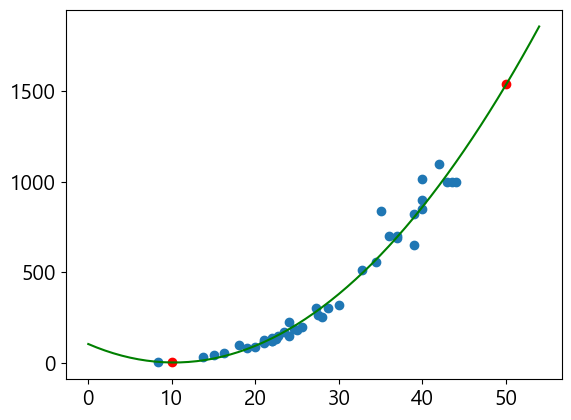

In [61]:
plt.scatter(train_length, train_weight)

point=np.arange(0,55)    #직선이 아닌 곡선으로 나타내기위해 양끝점이 아닌 최대한 가까운 점들로 잇기
plt.plot(point, 0.97*point**2-19.9*point+103, color='green')

plt.scatter([50,10],[1538,1.31],color='red')

In [62]:
print(lr.score(train_polylength,train_weight))
print(lr.score(test_polylength,test_weight))

0.9671986172059873
0.9881283580971195


## 아직 부족하지만 모델 성능 다항회귀로 많이 향상

# 3-1. 다중회귀(multiple regression)
- 2개 이상의 독립변수로 종속변수를 예측
- ex) 길이 뿐만 아니라 높이나 두께도 추가
### 예측값= n1*a + n2*b + n3*c + .... + n26*z +절편 (a,b,c~z는 각 독립변수들 값, n들은 각 독립변수들의 기울기)

In [25]:
import pandas as pd

df=pd.read_csv('https://bit.ly/perch_csv_data')   # read_csv로 인터넷의 데이터 다운 가능
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


## 데이터를 넘파이 형태로 저장 by .to_numpy()

In [63]:
perch_3v=df.to_numpy()    #행렬로
perch_3v.shape,perch_3v[:10,:], perch_weight  #3개의 독립변수들과 1개의 종속변수

((56, 3),
 array([[ 8.4 ,  2.11,  1.41],
        [13.7 ,  3.53,  2.  ],
        [15.  ,  3.82,  2.43],
        [16.2 ,  4.59,  2.63],
        [17.4 ,  4.59,  2.94],
        [18.  ,  5.22,  3.32],
        [18.7 ,  5.2 ,  3.12],
        [19.  ,  5.64,  3.05],
        [19.6 ,  5.14,  3.04],
        [20.  ,  5.08,  2.77]]),
 array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
         130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
         225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
         265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
         685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
         900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ]))

## train_test_split

In [64]:
train_3v, test_3v, train_weight, test_weight=train_test_split(perch_3v,perch_weight,random_state=1234)
train_3v.shape, test_3v.shape, train_weight.shape, test_weight.shape   #독립변수들이 2차원이어서 reshape필요 X

((42, 3), (14, 3), (42,), (14,))

## 다중회귀전에 독립변수들을 변환시킬 필요가 있음
## by sklearn.preprocessing.PolynomialFeatures

In [65]:
from sklearn.preprocessing import PolynomialFeatures

### 작동 예시

In [66]:
poly=PolynomialFeatures(include_bias=False)  #객체 생성, 옵션으로 필요없는 값 1을 제거/ 이 옵션없어도 회귀모델이 자동으로 무시하긴함
poly.fit([[2,3]])   #2차원 형태로 들어감, 우선 훈련시킴
poly.transform([[2,3]])   #실제 데이터로 변환

array([[2., 3., 4., 6., 9.]])

### 의미: 2그대로, 3그대로, 2^2, 2*3, 3^2

In [67]:
# 더 간편한 방식 -> fit_transform사용 하지만 자제하는 것이 중요
poly.fit_transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

## train_3v와 test_3v변환필요
## !!!polynomialfeature에서 훈련세트로 fit한것을 이용해 테스트세트를 변환하는것이 좋음!!!!

In [68]:
poly.fit(train_3v)   #훈련세트로 fit
train_3vp=poly.transform(train_3v)
test_3vp=poly.transform(test_3v)   #train_3v로 fit한걸 test에도 transform
train_3vp.shape, test_3vp.shape,train_3vp[:10,:]

((42, 9),
 (14, 9),
 array([[  37.    ,   10.84  ,    6.26  , 1369.    ,  401.08  ,  231.62  ,
          117.5056,   67.8584,   39.1876],
        [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
           41.4736,   23.6992,   13.5424],
        [  22.7   ,    5.95  ,    3.63  ,  515.29  ,  135.065 ,   82.401 ,
           35.4025,   21.5985,   13.1769],
        [  40.    ,   11.73  ,    7.22  , 1600.    ,  469.2   ,  288.8   ,
          137.5929,   84.6906,   52.1284],
        [  21.    ,    5.69  ,    3.56  ,  441.    ,  119.49  ,   74.76  ,
           32.3761,   20.2564,   12.6736],
        [  19.    ,    5.64  ,    3.05  ,  361.    ,  107.16  ,   57.95  ,
           31.8096,   17.202 ,    9.3025],
        [  42.    ,   12.8   ,    6.87  , 1764.    ,  537.6   ,  288.54  ,
          163.84  ,   87.936 ,   47.1969],
        [  22.    ,    6.11  ,    3.41  ,  484.    ,  134.42  ,   75.02  ,
           37.3321,   20.8351,   11.6281],
        [  22.    ,    5.88  ,    3.

## 9열들이 실제로 어떤값들인지
- 변수 a,b,c에대해 a , b , c , a^2 , a*b , a*c , b^2 , b*c , c^2

In [69]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 다중회귀도 그대로 LinearRegression사용
### poly-transformed된 값을 집어넣음

In [70]:
lr=LinearRegression()
lr.fit(train_3vp,train_weight)   #poly-transformed된 값을 집어넣음

LinearRegression()

In [71]:
lr.score(train_3vp,train_weight), lr.score(test_3vp,test_weight)   #훨씬더 정확해짐

(0.9892417459890812, 0.9848861741569646)

## !!!!고차항의 최대차수를 지정하여 특성을 더 추가할 수 있음!!!!

In [86]:
poly=PolynomialFeatures(degree=5, include_bias=False)   #degree=5는 5제곱까지 특성을 넣음
poly.fit(train_3v)
train_3vp=poly.transform(train_3v)
test_3vp=poly.transform(test_3v)
train_3vp.shape, test_3vp.shape   #엄청 많은 열들

((42, 55), (14, 55))

In [73]:
lr.fit(train_3vp,train_weight)
lr.score(train_3vp,train_weight)   #엄청 정확해짐

0.9999999999945918

## BUT 문제점->과대적합(과도하게 학습)되어 오히려 오차커짐(보편적인 패턴을 학습하지 못해서)
## -> 규제라는 과정이 필요

In [74]:
lr.score(test_3vp,test_weight)

-101.18147262905767

## 그전에 정규화

In [136]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_3vp)   #train세트로 정규화 fit->학습
train_3vp_scaled=ss.transform(train_3vp)  #fit학습된걸로 정규화
test_3vp_scaled=ss.transform(test_3vp)    #train세트로 test세트에도 정규화

In [90]:
test_3vp_scaled.shape

(14, 55)

# 3-2. 릿지회귀, 라쏘회귀
## 선형회귀모델에 규제를 추가한 버전

# 3-2-1. 릿지회귀
- sklearn.linear_model.Ridge함수사용

In [91]:
from sklearn.linear_model import Ridge

ridge=Ridge()    #이 안에 규제와 관련된 alpha옵션 정해서 넣을수있음
ridge.fit(train_3vp_scaled,train_weight)  #학습

Ridge()

In [95]:
#고차항이더라도 릿지회귀가 알알서 조절
ridge.score(train_3vp_scaled,train_weight), ridge.score(test_3vp_scaled,test_weight)  

(0.9888431656242801, 0.9858204095805263)

## 규제양 조절하기by alpha값
- alpha값이 크면 규제강도가 세져 과소적합되도록 유도
- alpha값이 작으면 선형회귀모델과 유사해짐->과대적합될 가능성이 큼

## alpha값 찾기->alpha의 R^2값 그래프 그려서 train set와 test set값이 가장 가까운 지점이 최적의 alpha값-> 0.001부터 100까지 10배씩 늘러가며 릿지회귀모델 훈련시키고 값 비교

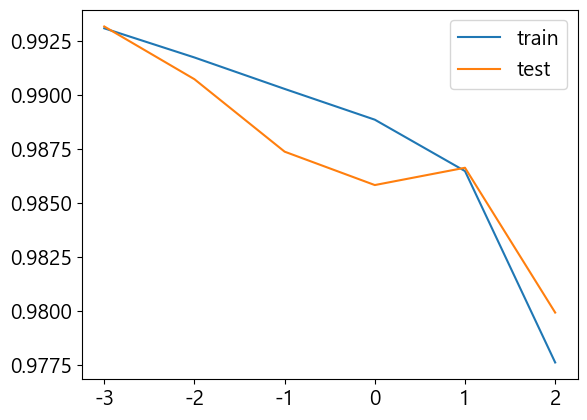

In [96]:
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)     #alpha지정
    ridge.fit(train_3vp_scaled,train_weight)     #릿지모델 훈련
    train_score.append(ridge.score(train_3vp_scaled,train_weight))   # r^2값들 집어넣음
    test_score.append(ridge.score(test_3vp_scaled,test_weight))

# alpha_list안의 있는 값들을 동일한 거리로 나타내기 위해 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list),train_score,label='train')
plt.plot(np.log10(alpha_list),test_score,label='test')
plt.legend()
plt.show()

## alpha=10^1일때 제일 정확

In [159]:
ridge=Ridge(alpha=10)   
ridge.fit(train_3vp_scaled,train_weight)  
ridge.score(train_3vp_scaled,train_weight), ridge.score(test_3vp_scaled,test_weight)

(0.9864672643074723, 0.9866207179488541)

## 예측해보기

In [120]:
#각 특징의 평균을 임의의 데이터로
data=perch_3v[:,:].mean(axis=0)
data=data.reshape(1,-1)    #(1,3)의 행렬로 reshape
data.shape

(1, 3)

In [126]:
#3개짜리 데이터를 degree=5를 통해 55개의 값을 가지게함
poly=PolynomialFeatures(degree=5, include_bias=False)  
poly.fit(data)
data_p=poly.transform(data)

# 위에 정규화하기위해 train세트로 fit해둔거로 transform함 
data_p_scaled=ss.transform(data_p)
data_p_scaled.shape

(1, 55)

In [160]:
ridge.predict(data_p_scaled)  #292값정도로 나옴

array([287.1710907])

## 계수 몇개가 0이 되었는지 확인

In [162]:
np.sum(ridge.coef_==0)

0

# 3-2-2. 라쏘회귀
- 릿지회귀와 방식 동일
- sklearn.linear_model.Lasso함수 사용

In [137]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_3vp_scaled,train_weight)
lasso.score(train_3vp_scaled,train_weight), lasso.score(test_3vp_scaled,test_weight)  

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.265e+02, tolerance: 4.993e+02
  model = cd_fast.enet_coordinate_descent(


(0.9881865081467087, 0.9852859384959229)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.755e+04, tolerance: 4.993e+02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.271e+03, tolerance: 4.993e+02
  model = cd_fast.enet_coordinate_descent(


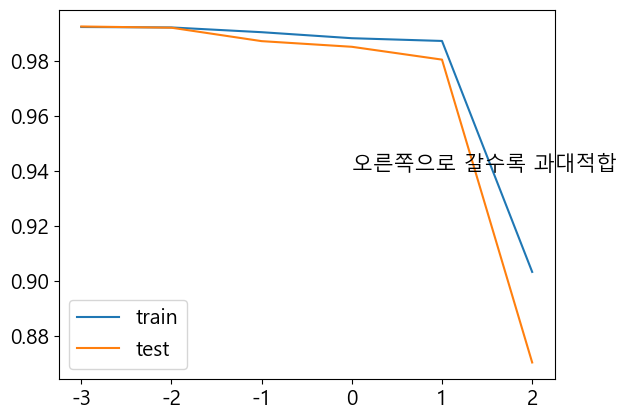

In [140]:
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha, max_iter=10000)     #최적의 계수를 찾기위해 반복적인 계산을 수행하며 max_iter는 그 최대시행횟수->높아야지 에러안남
    lasso.fit(train_3vp_scaled,train_weight)     
    train_score.append(lasso.score(train_3vp_scaled,train_weight))  
    test_score.append(lasso.score(test_3vp_scaled,test_weight))


plt.plot(np.log10(alpha_list),train_score,label='train')
plt.plot(np.log10(alpha_list),test_score,label='test')
plt.legend()
plt.text(0,0.94,'오른쪽으로 갈수록 과대적합')
plt.show()

In [143]:
# alpha=10^-2인 0.001이 제일 정확
lasso=Lasso(alpha=0.01)
lasso.fit(train_3vp_scaled,train_weight)
lasso.score(train_3vp_scaled,train_weight), lasso.score(test_3vp_scaled,test_weight)  

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.049e+04, tolerance: 4.993e+02
  model = cd_fast.enet_coordinate_descent(


(0.9905103055547501, 0.9883556825372557)

## lasso.coef_로 계수값이 0이 된것을 볼수있음

In [145]:
np.sum(lasso.coef_==0)   #55개중 54개만 사용하고 1개는 0으로

1

## 예측해보기

In [163]:
lasso.predict(data_p_scaled), ridge.predict(data_p_scaled)

(array([291.79244667]), array([287.1710907]))